<a href="https://colab.research.google.com/github/broskunta/PyTorch-Linear-Regression/blob/main/Linear_Regression_Training_and_Validation_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Regression : Training and Validation Data
* How to use learning rate to improve the model

### Preparation

In [1]:
# import required libraries

from torch import nn
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn, optim

### Make Data

In [3]:
# Create Data class

from torch.utils.data import Dataset, DataLoader

class Data(Dataset):

    # Constructor
    def __init__(self, train = True):
            self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
            self.f = -3 * self.x + 1
            self.y = self.f + 0.1 * torch.randn(self.x.size())
            self.len = self.x.shape[0]

            #outliers
            if train == True:
                self.y[0] = 0
                self.y[50:55] = 20
            else:
                pass

    # Getter
    def __getitem__(self, index):
        return self.x[index], self.y[index]

    # Get Length
    def __len__(self):
        return self.len

In [4]:
# create training and validation set
train_data = Data()
val_data = Data(train= False)

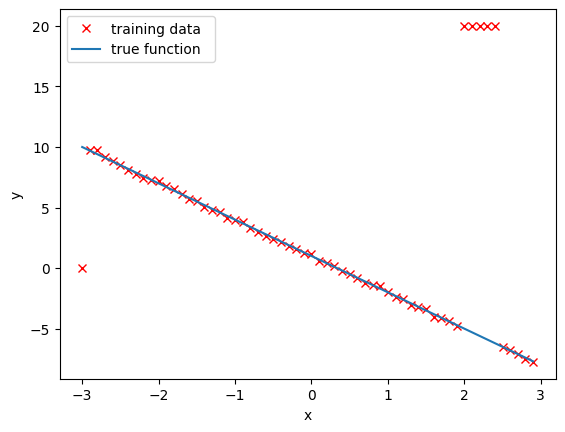

In [5]:
# plot the data points


plt.plot(train_data.x.numpy(), train_data.y.numpy(), 'xr',label="training data ")
plt.plot(train_data.x.numpy(), train_data.f.numpy(),label="true function  ")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### Create linear regression object, data loader and criterion function

In [6]:
# Create Linear Regression Class

from torch import nn

class linear_regression(nn.Module):

    # Constructor
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    # Prediction function
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [7]:
# create loss function
criterion = nn.MSELoss()
trainloader = DataLoader(dataset=train_data, batch_size= 1)

### Different learning rate and data structures to store results for each hyperparameter

In [8]:
# Create Learning Rate list, the error lists and the MODELS list

learning_rates = [0.0001, 0.001, 0.01, 0.1]

train_error = torch.zeros(len(learning_rates))
validation_error = torch.zeros(len(learning_rates))

MODELS = []

### Train different Models

In [16]:
# define the training model

def train_model_with_lr(iters, lr_list):
    #iterate through different learning rates
    for i, lr in enumerate(lr_list):
        model = linear_regression(1,1)
        optimizer = optim.SGD(model.parameters(), lr = lr)
        for epoch in range(iters):
            for x,y in trainloader:

                #make pred
                yhat = model(x)
                #loss
                loss = criterion(yhat, y)
                #zero grad
                optimizer.zero_grad()
                #back passs
                loss.backward()
                #paramter update
                optimizer.step()

        #train data
        Yhat = model(train_data.x)
        train_loss = criterion(Yhat, train_data.y)
        train_error[i] = train_loss.item()


        #validation data
        Yhat = model(val_data.x)
        val_loss = criterion(Yhat, val_data.y)
        validation_error[i] = val_loss.item()
        MODELS.append(model)

In [17]:
# train the model
train_model_with_lr(10, learning_rates)

### Viewing the results

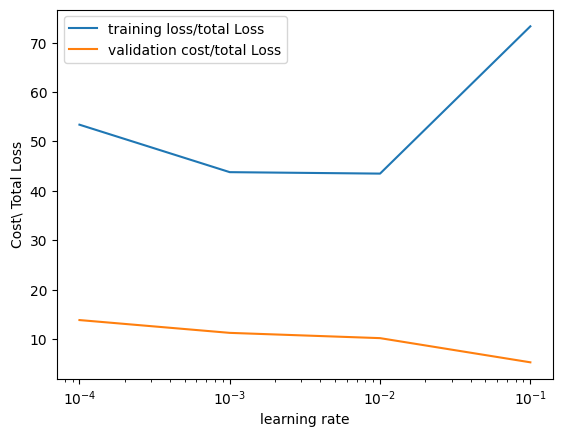

In [18]:
# Plot the training loss and validation loss

plt.semilogx(np.array(learning_rates), train_error.numpy(), label = 'training loss/total Loss')
plt.semilogx(np.array(learning_rates), validation_error.numpy(), label = 'validation cost/total Loss')
plt.ylabel('Cost\ Total Loss')
plt.xlabel('learning rate')
plt.legend()
plt.show()

0 [[2.7665052]
 [2.671187 ]
 [2.5758684]]
1 [[5.837021 ]
 [5.719159 ]
 [5.6012974]]
2 [[6.5879607]
 [6.453253 ]
 [6.318545 ]]
3 [[14.269044]
 [13.840073]
 [13.411101]]


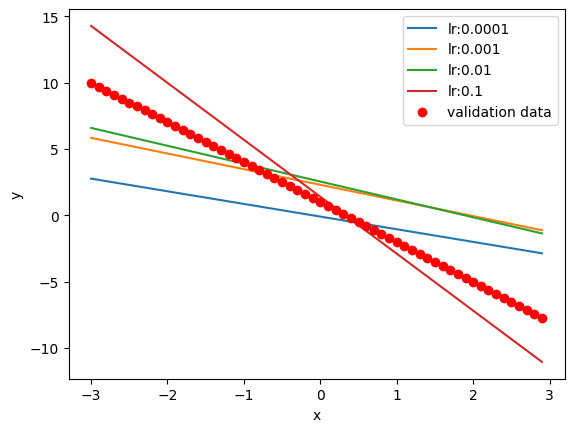

In [19]:
# Plot the predictions

i = 0
for model, learning_rate in zip(MODELS, learning_rates):
    yhat = model(val_data.x)
    plt.plot(val_data.x.numpy(), yhat.detach().numpy(), label = 'lr:' + str(learning_rate))
    print(i, yhat.detach().numpy()[0:3])
    i+=1
plt.plot(val_data.x.numpy(), val_data.f.numpy(), 'or', label = 'validation data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [20]:
good_model = MODELS[np.argmin(validation_error)]

for x, y in trainloader:
    print("yhat= ", model(x),"y", y)

yhat=  tensor([[14.2690]], grad_fn=<AddmmBackward0>) y tensor([[0.]])
yhat=  tensor([[13.8401]], grad_fn=<AddmmBackward0>) y tensor([[9.7722]])
yhat=  tensor([[13.4111]], grad_fn=<AddmmBackward0>) y tensor([[9.7305]])
yhat=  tensor([[12.9821]], grad_fn=<AddmmBackward0>) y tensor([[9.1565]])
yhat=  tensor([[12.5532]], grad_fn=<AddmmBackward0>) y tensor([[8.8411]])
yhat=  tensor([[12.1242]], grad_fn=<AddmmBackward0>) y tensor([[8.5100]])
yhat=  tensor([[11.6952]], grad_fn=<AddmmBackward0>) y tensor([[8.0792]])
yhat=  tensor([[11.2662]], grad_fn=<AddmmBackward0>) y tensor([[7.7460]])
yhat=  tensor([[10.8373]], grad_fn=<AddmmBackward0>) y tensor([[7.4685]])
yhat=  tensor([[10.4083]], grad_fn=<AddmmBackward0>) y tensor([[7.2699]])
yhat=  tensor([[9.9793]], grad_fn=<AddmmBackward0>) y tensor([[7.2336]])
yhat=  tensor([[9.5504]], grad_fn=<AddmmBackward0>) y tensor([[6.7691]])
yhat=  tensor([[9.1214]], grad_fn=<AddmmBackward0>) y tensor([[6.5478]])
yhat=  tensor([[8.6924]], grad_fn=<AddmmBackw